# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [99]:
#Import all the necessary modules
%matplotlib inline
warnings.filterwarnings('ignore')
import warnings 

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib as plt

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [100]:
pima_df = pd.read_csv("pima-indians-diabetes-1.data")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [101]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
pima_df = pd.read_csv("pima-indians-diabetes-1.data",names=colnames)
pima_df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [102]:
pima_df.dtypes

preg         int64
glu          int64
bp           int64
sft          int64
ins          int64
bmi        float64
dpf        float64
age          int64
outcome      int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [103]:
pima_df.shape

(768, 9)

# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [104]:
# for col in pima_df.columns:
#    median = pima_df[col].median
#    print('col, median: ', col, median)
#    pima_df[col].replace(to_replace=0, value = pima_df[col].median, inplace = True)
# Index(['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome'], dtype='object')

for col in pima_df.columns:
    med_col = pima_df[col].median(skipna=True)
    pima_df.loc[ pima_df[col] == 0 | np.isnan(pima_df[col]), col ] = med_col

pima_df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,3.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0



# Q5 Print the descriptive statistics of each & every column using describe() function

In [105]:
pima_df.describe()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [69]:
# Observation: bmi and sft are positively correlated
pima_df.describe()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

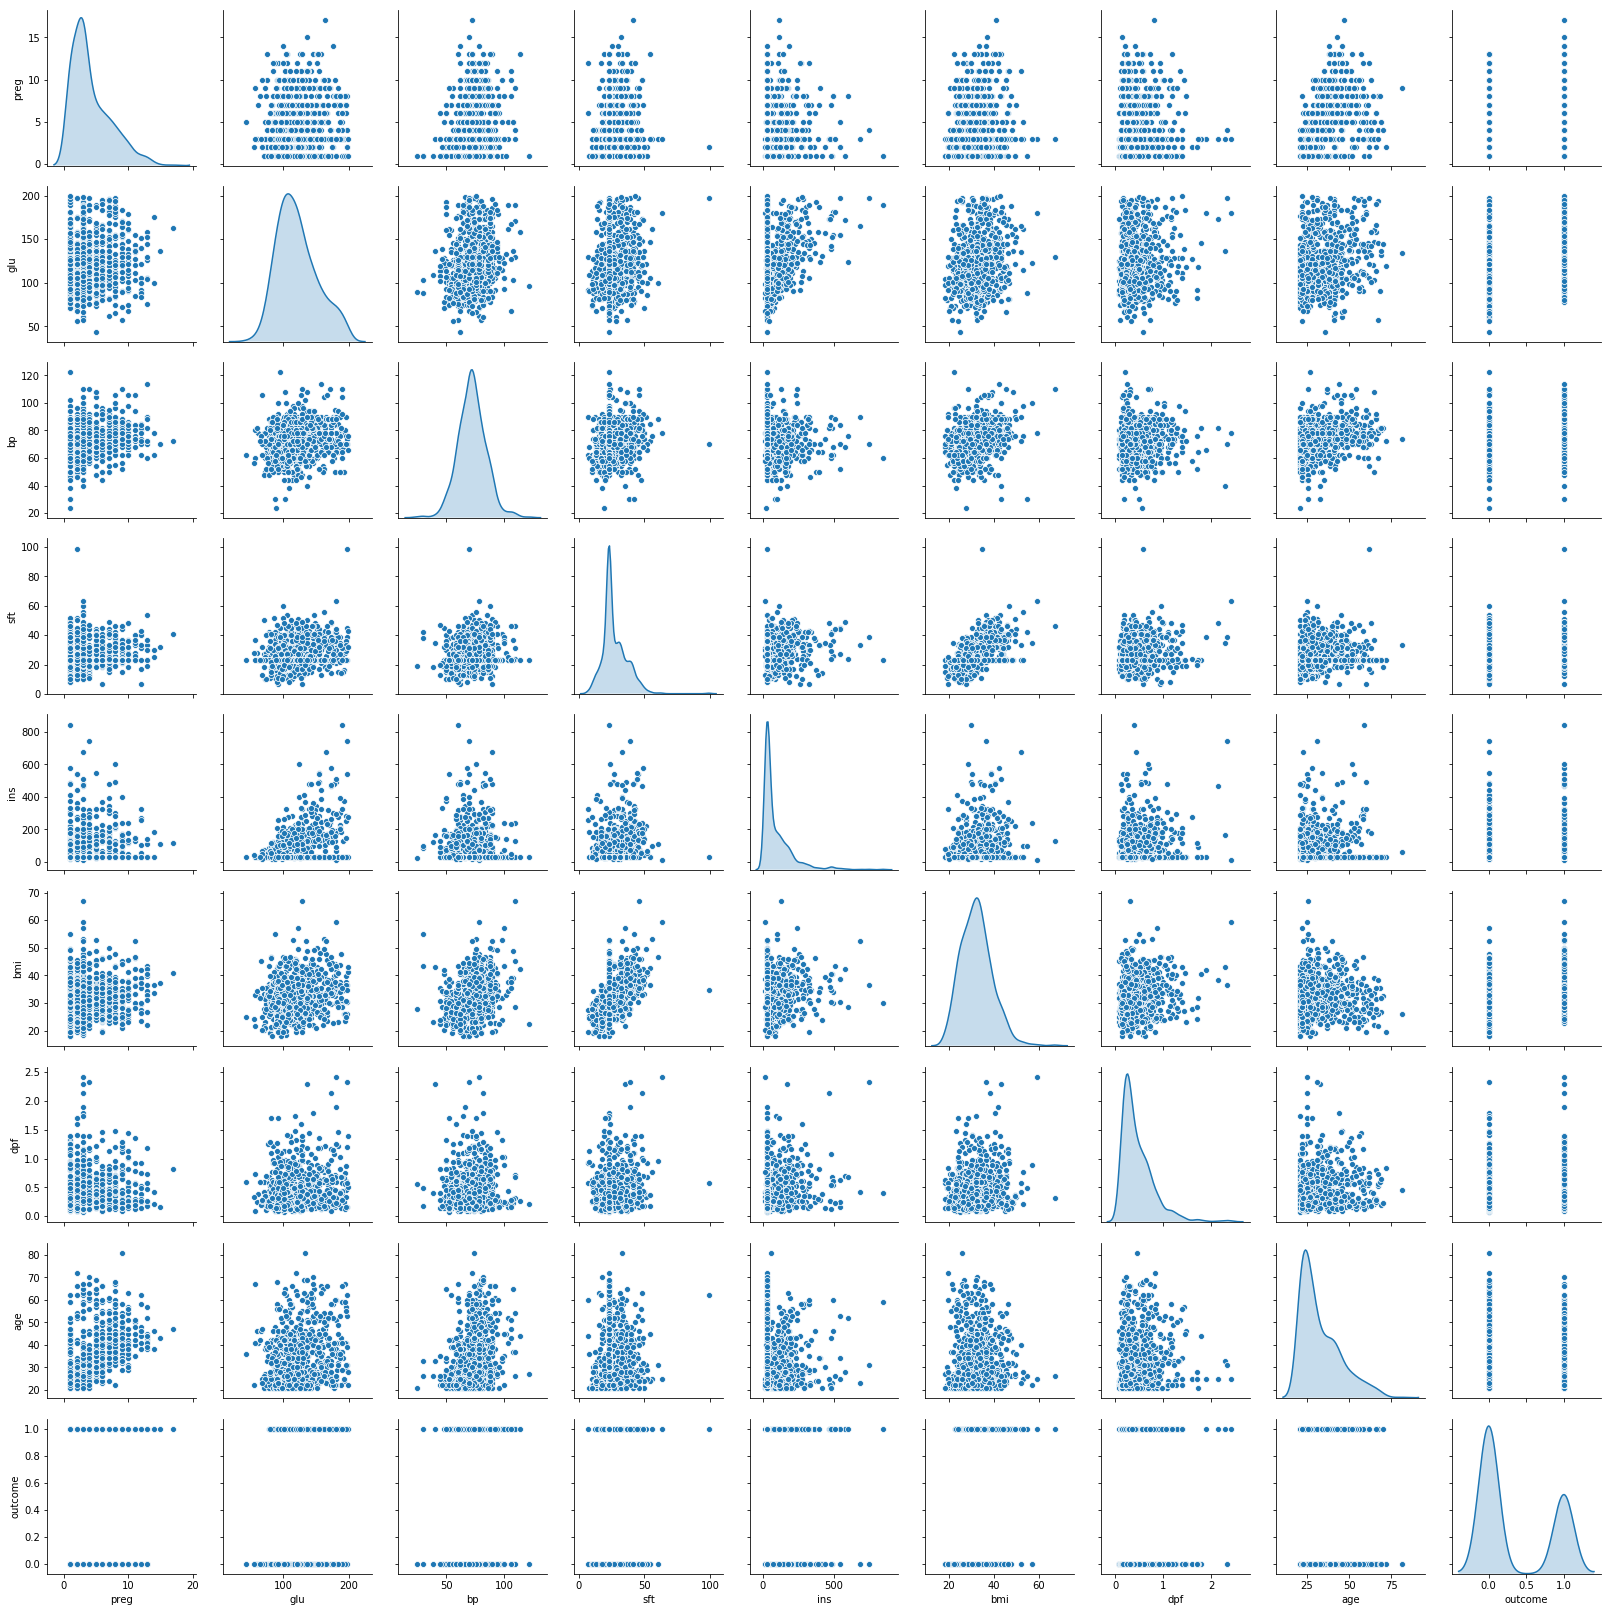

In [71]:
import seaborn as sns
sns.pairplot(pima_df,diag_kind='kde')
# The pair plot clearly shows that - via observation - that bmi & sft has very strong positive correlation

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [75]:
Y = pima_df['outcome']
# since we observed that sft & bmi are possitively correlated, to avoid double bias - dropping sft from the independent var set
X = pima_df[['preg', 'glu', 'bp', 'ins', 'bmi', 'dpf', 'age']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [76]:
model=DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [81]:
Y_pred = model.predict(X_test)
acc=metrics.accuracy_score(Y_test,Y_pred)
print(acc)

0.7402597402597403


Print the feature importance of the decision model - Optional

In [82]:
cm=metrics.confusion_matrix(Y_test,Y_pred)
print(cm)

[[116  30]
 [ 30  55]]


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [86]:
pima_df.shape
Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',max_depth=2,random_state=0 )
Rf_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [88]:
Y_pred_Rf=Rf_model.predict(X_test)
Rf_acc=metrics.accuracy_score(Y_test,Y_pred_Rf)
print(Rf_acc)

0.7619047619047619


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [92]:
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier(base_estimator=Rf_model,n_estimators= 51)
abcl.fit(X_train,Y_train)
abcl.score(X_test , Y_test)

0.7922077922077922

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [93]:
bgcl = BaggingClassifier(base_estimator=Rf_model,n_estimators=51,oob_score=True)
bgcl.fit(X_train,Y_train)
bgcl.oob_score_     ### testing the ensemble against OOB
bgcl.score(X_test, Y_test) # use this if you have reserved any dataset for testing

0.7662337662337663

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [98]:
gbcl = GradientBoostingClassifier(loss='exponential',n_estimators=51)
gbcl.fit(X_train,Y_train)
gbcl.score(X_test, Y_test)

0.7878787878787878

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.